#  how to deal imbalanced dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# you can imbalance the diabetes file yourself open csv file directly and change most of 1 to 0 and make it imbalance
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes_up_down.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# counter module to count each class
from collections import Counter
Counter(df['Outcome'])


Counter({0: 720, 1: 48})

In [4]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [6]:
Counter(y_train)

Counter({0: 544, 1: 32})

# Over Sampling using SMOTE (Synthetic Minority Oversampling Technique)

• This technique can be used when you have small data set

This uses the euclidian distance method and find the closest data points to the minority class and create new minority data points.

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
ove_smp=SMOTE(random_state=41,k_neighbors=3,sampling_strategy=0.75)
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)

print("the number of classes before fit {}".format(Counter(y_train)))
print("the number of classes after fit {}".format(Counter(y_train_ns)))

the number of classes before fit Counter({0: 544, 1: 32})
the number of classes after fit Counter({0: 544, 1: 408})


# Downsampling using NearMiss

• This technique can be used when you have large data set

• This uses the euclidian distance method and find the closest data points to the minority class and will eliminate the majority data points which are not close to the minority data points.

In [9]:
from imblearn.under_sampling import NearMiss

In [10]:
ds=NearMiss(n_neighbors=3,sampling_strategy=0.5)

X_train_ns,y_train_ns=ds.fit_resample(X_train,y_train)
print("the number of class before fit {}".format(Counter(y_train)))
print("the number of class after fit {}".format(Counter(y_train_ns)))

the number of class before fit Counter({0: 544, 1: 32})
the number of class after fit Counter({0: 64, 1: 32})


# Log_PowerTransformer

In [11]:
# lets  start with importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# please check the Logistic Regression videos for data set information

In [12]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:


# replacing zero values with the mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [15]:
print(data.shape)

(768, 9)


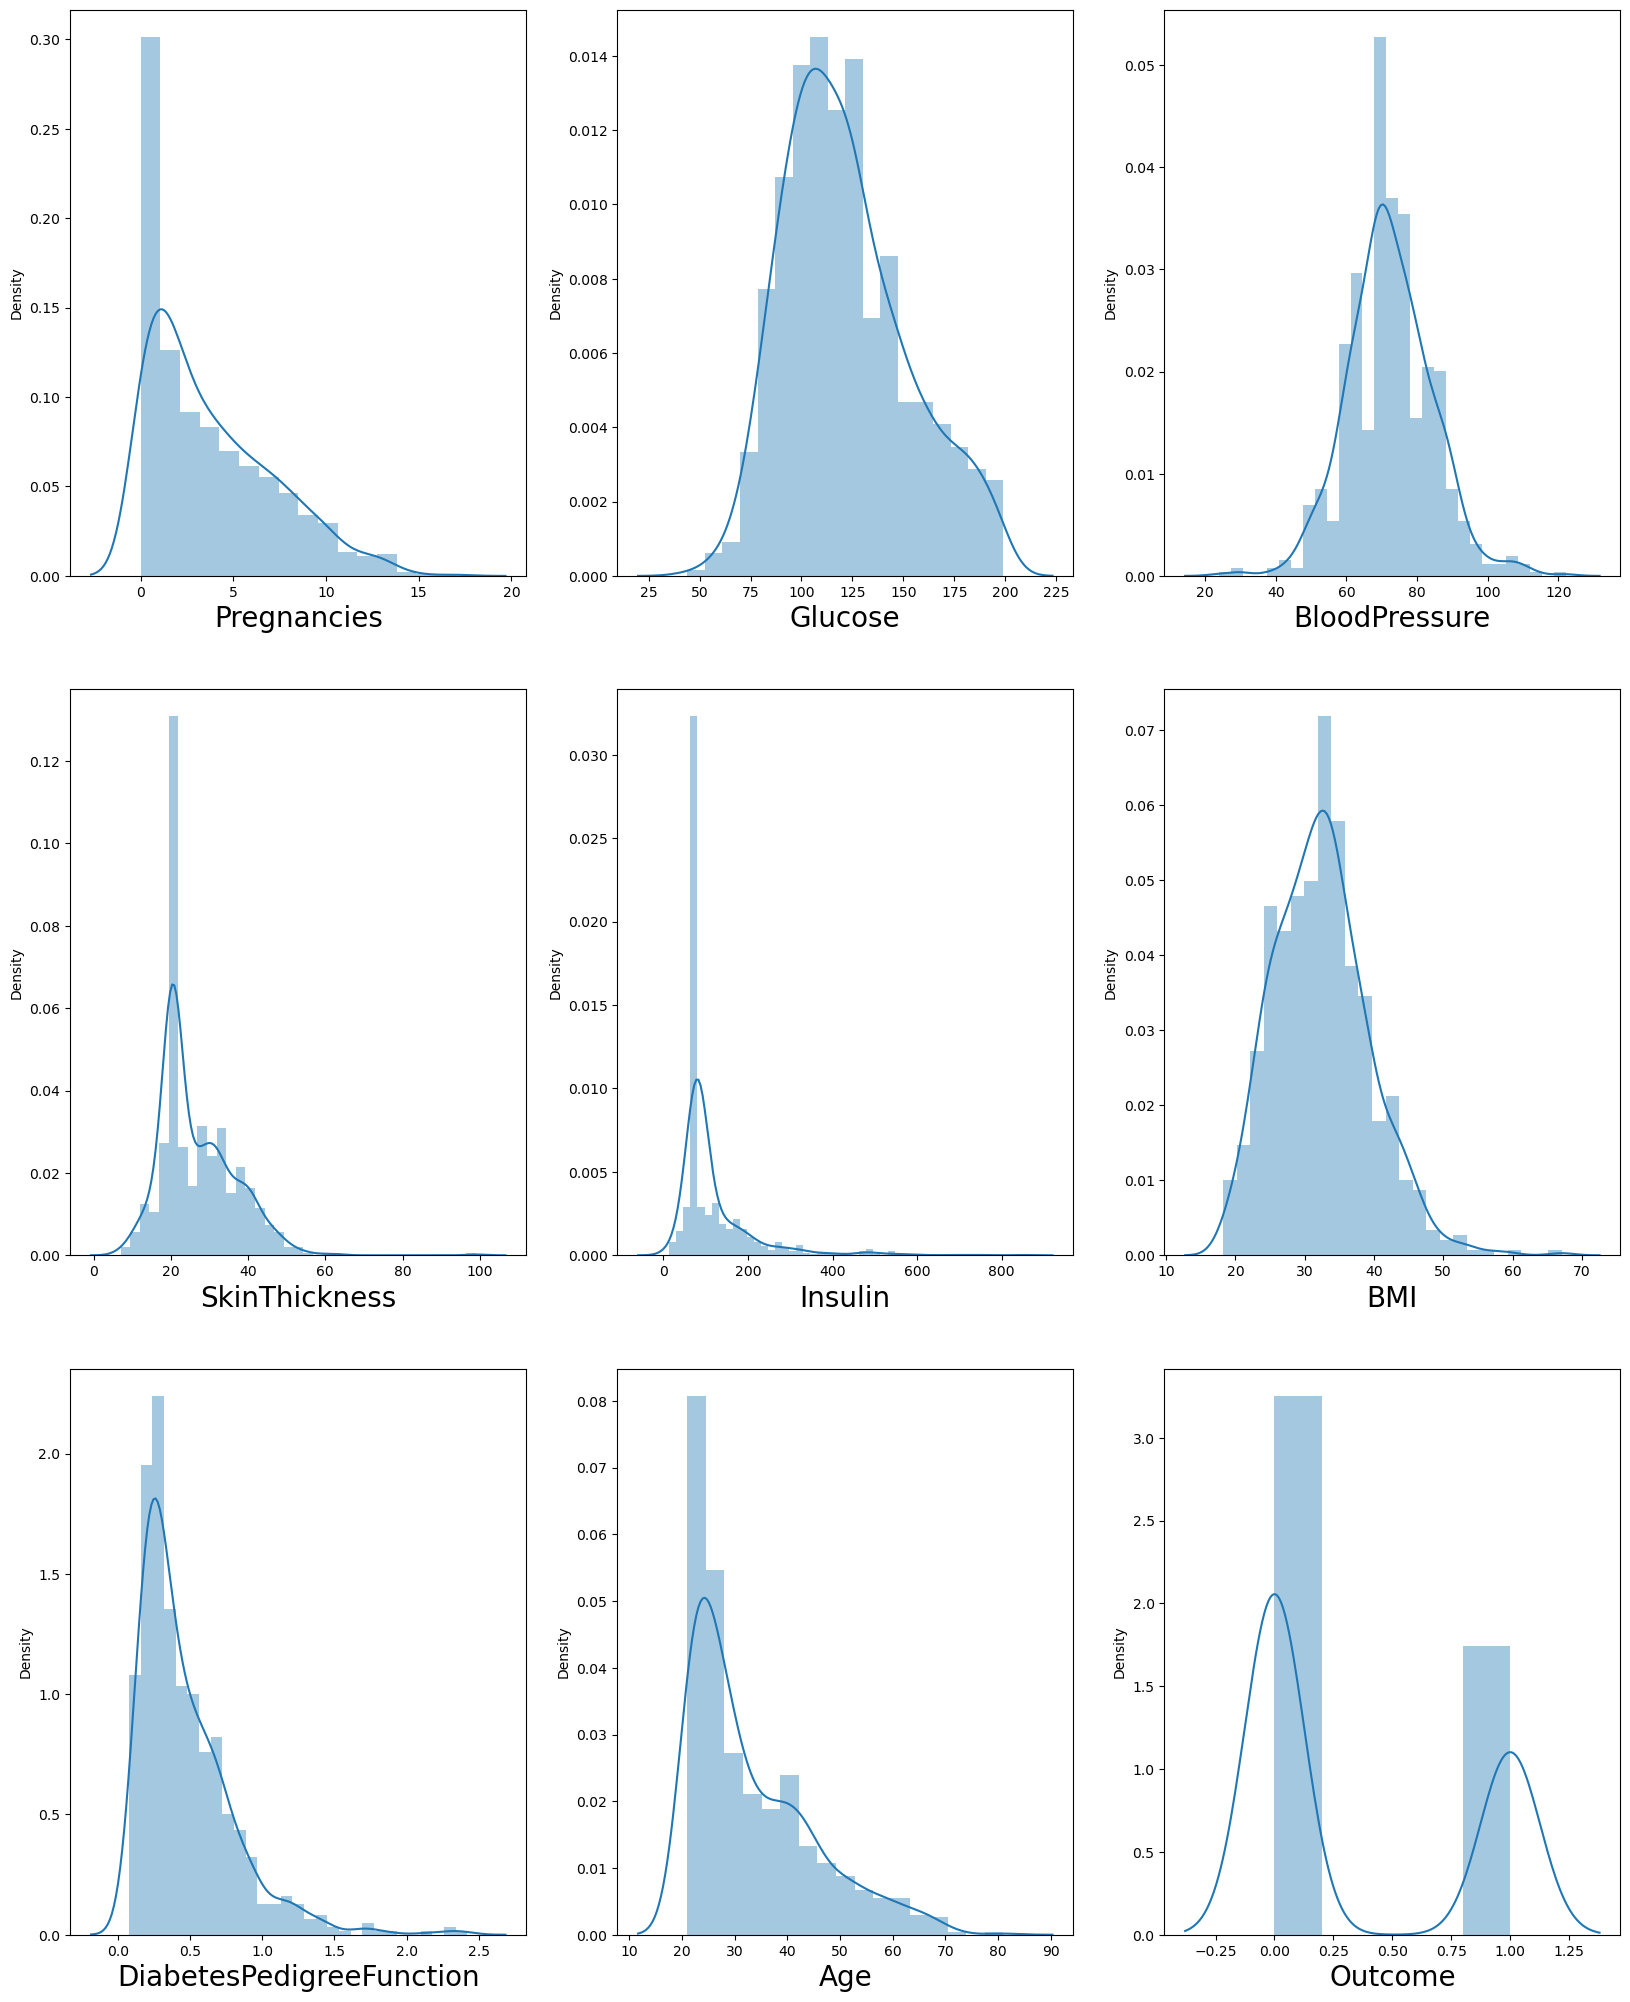

In [18]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Apply Log transformation on continues variable

It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

In [19]:
data['Insulin']=np.log(data['Insulin'])
data['BloodPressure']=np.log(data['BloodPressure'])
data['SkinThickness']=np.log(data['SkinThickness'])
data['BMI']=np.log(data['BMI'])
data['DiabetesPedigreeFunction']=np.log(data['DiabetesPedigreeFunction'])
data['Age']=np.log(data['Age'])

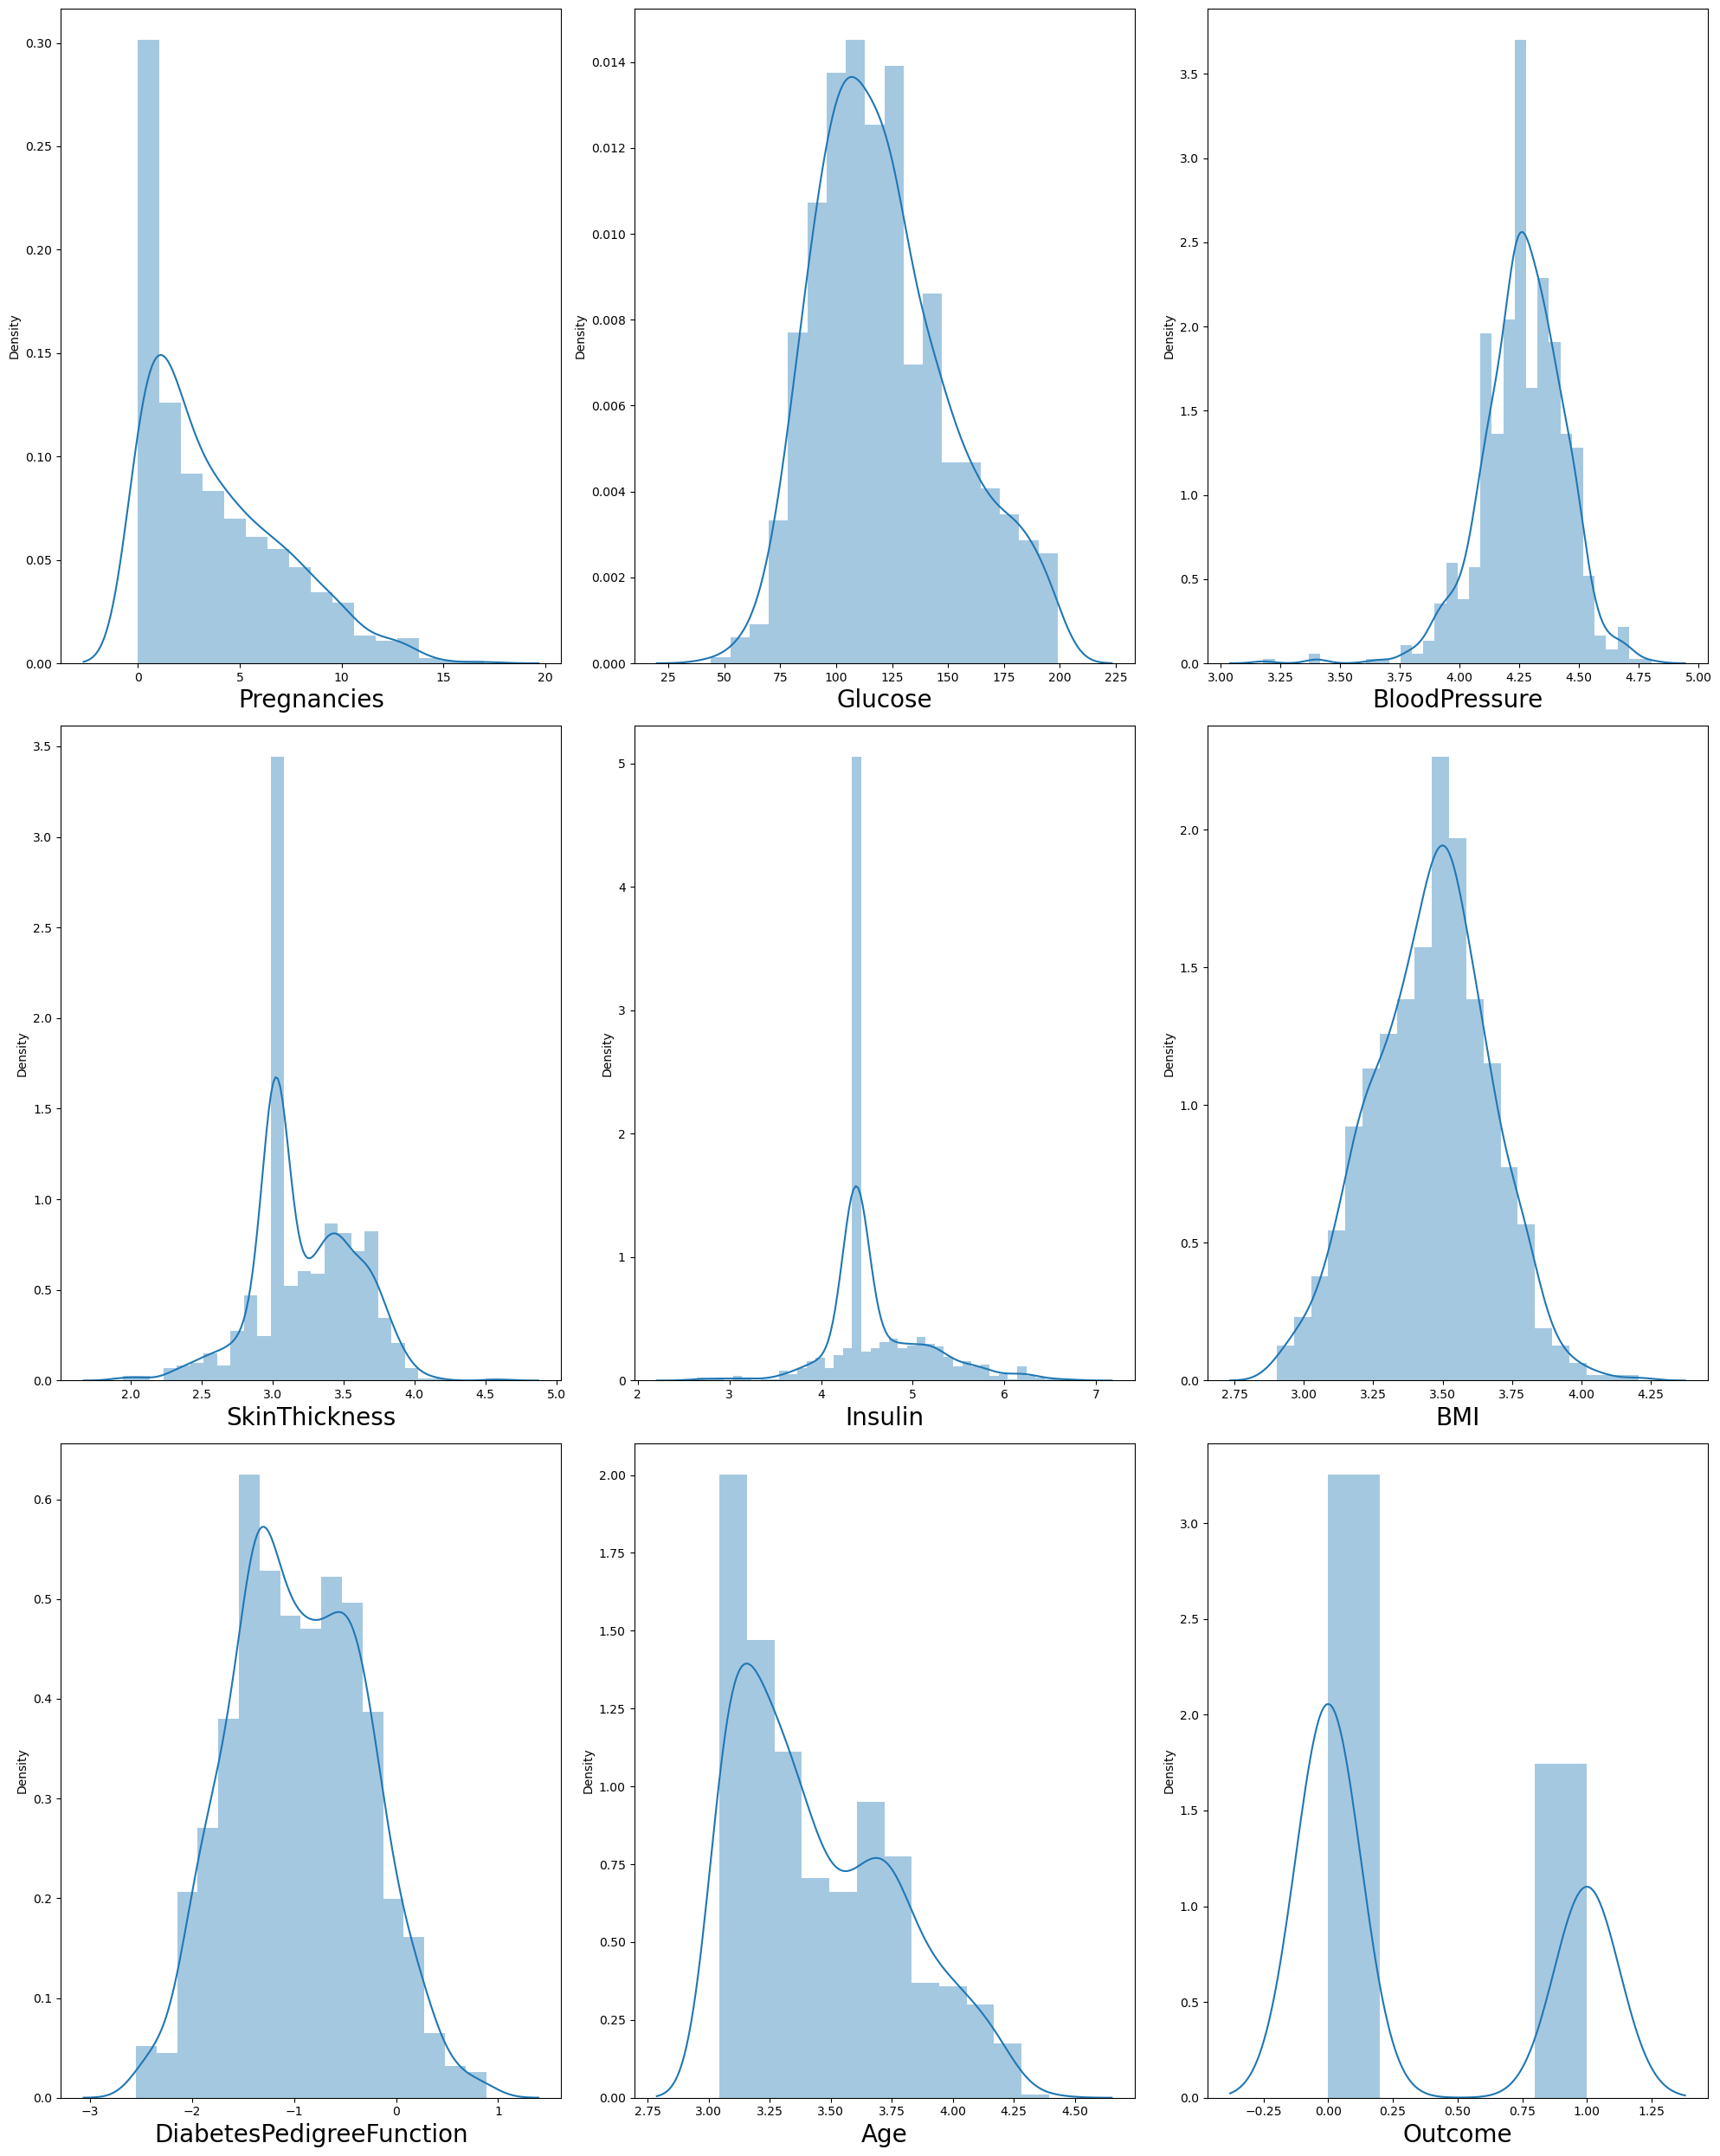

In [20]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# powertransformer
it is a data transformation technique used to stabilize variance make the data more normal distribution-like

In [21]:
# read files
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [23]:
features=['Insulin','BMI','BloodPressure','SkinThickness','Age']

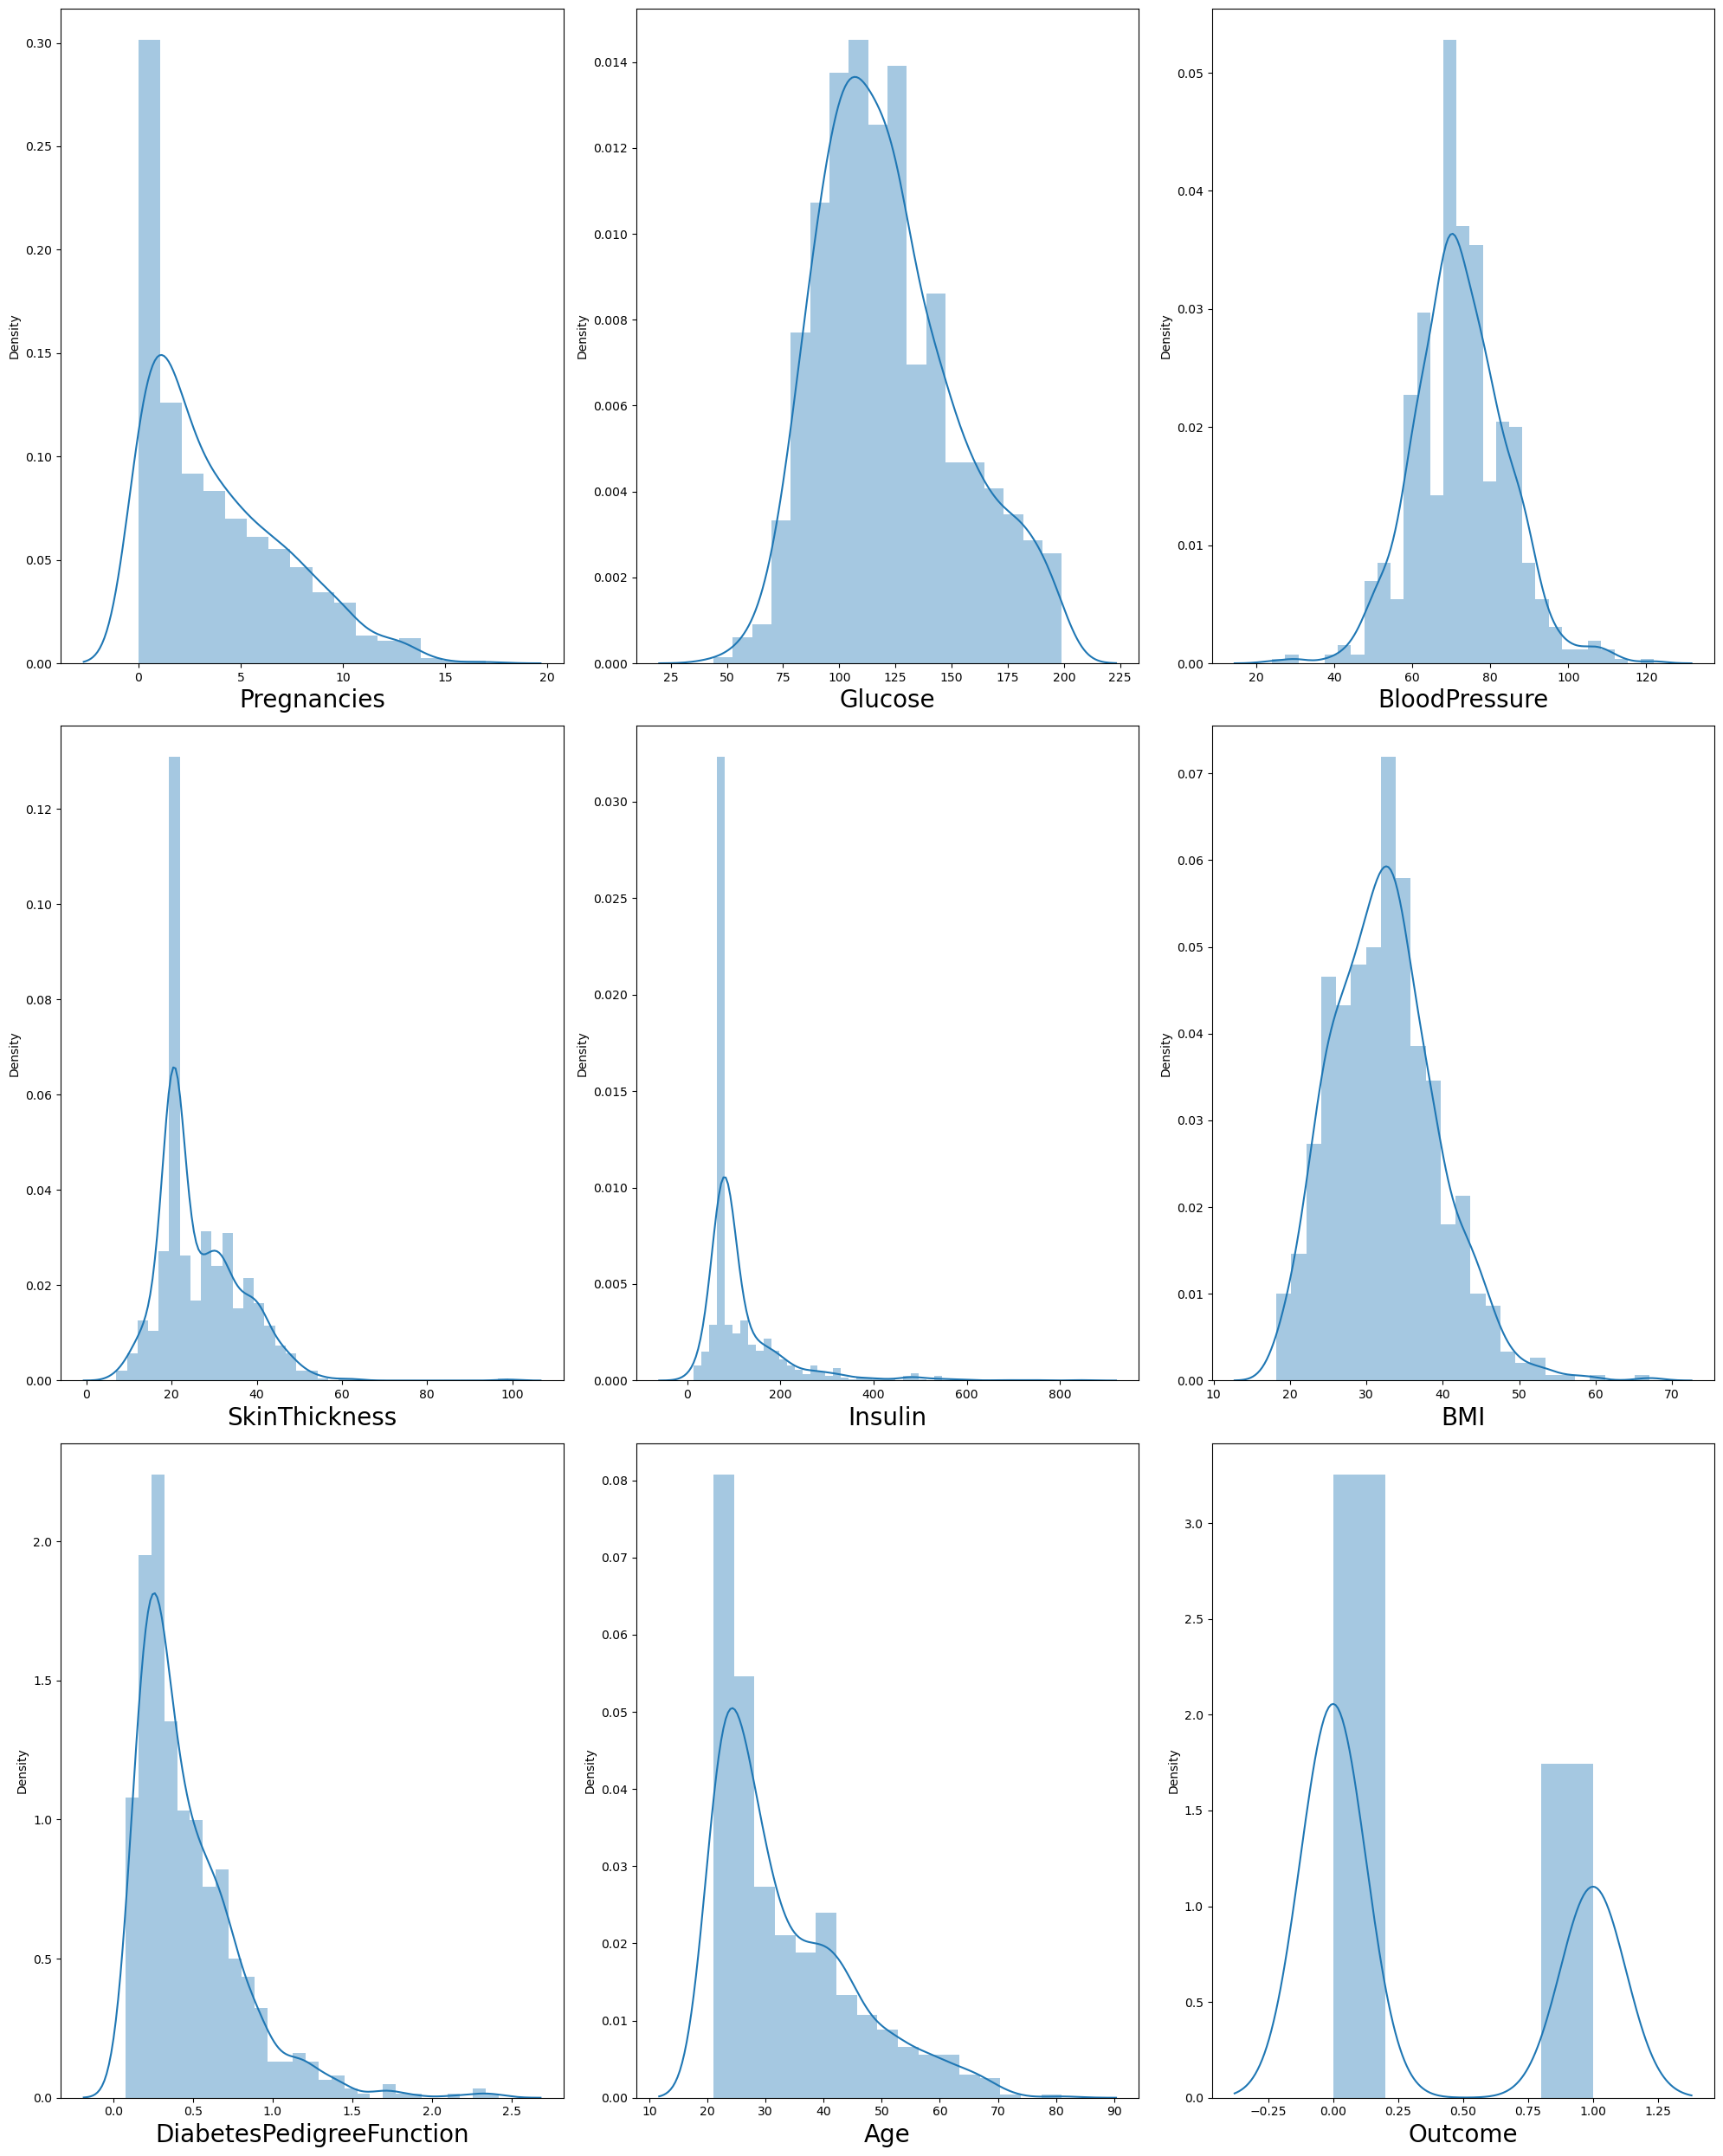

In [24]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#  Box-Cox works with only positive values(>0)
# Yeo-Johnson woks with both positive and negative values

In [25]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')

In [26]:
data[features]=scaler.fit_transform(data[features].values)

In [27]:
data[features]

,Insulin,BMI,BloodPressure,SkinThickness,Age
0,-0.350666,0.261508,-0.009147,0.956846,1.362797
1,-0.350666,-0.841776,-0.507220,0.415886,0.127990
2,-0.350666,-1.457249,-0.674630,-0.567991,0.231506
3,-0.025195,-0.584749,-0.507220,-0.246245,-1.483064
4,1.006677,1.462877,-2.750268,0.956846,0.328461
...,...,...,...,...,...
763,1.117625,0.161140,0.319657,1.873163,1.764261
764,-0.350666,0.697359,-0.174501,0.211217,-0.366775
765,0.305525,-0.912547,-0.009147,-0.246245,0.017237
766,-0.350666,-0.260838,-1.011681,-0.567991,1.236934


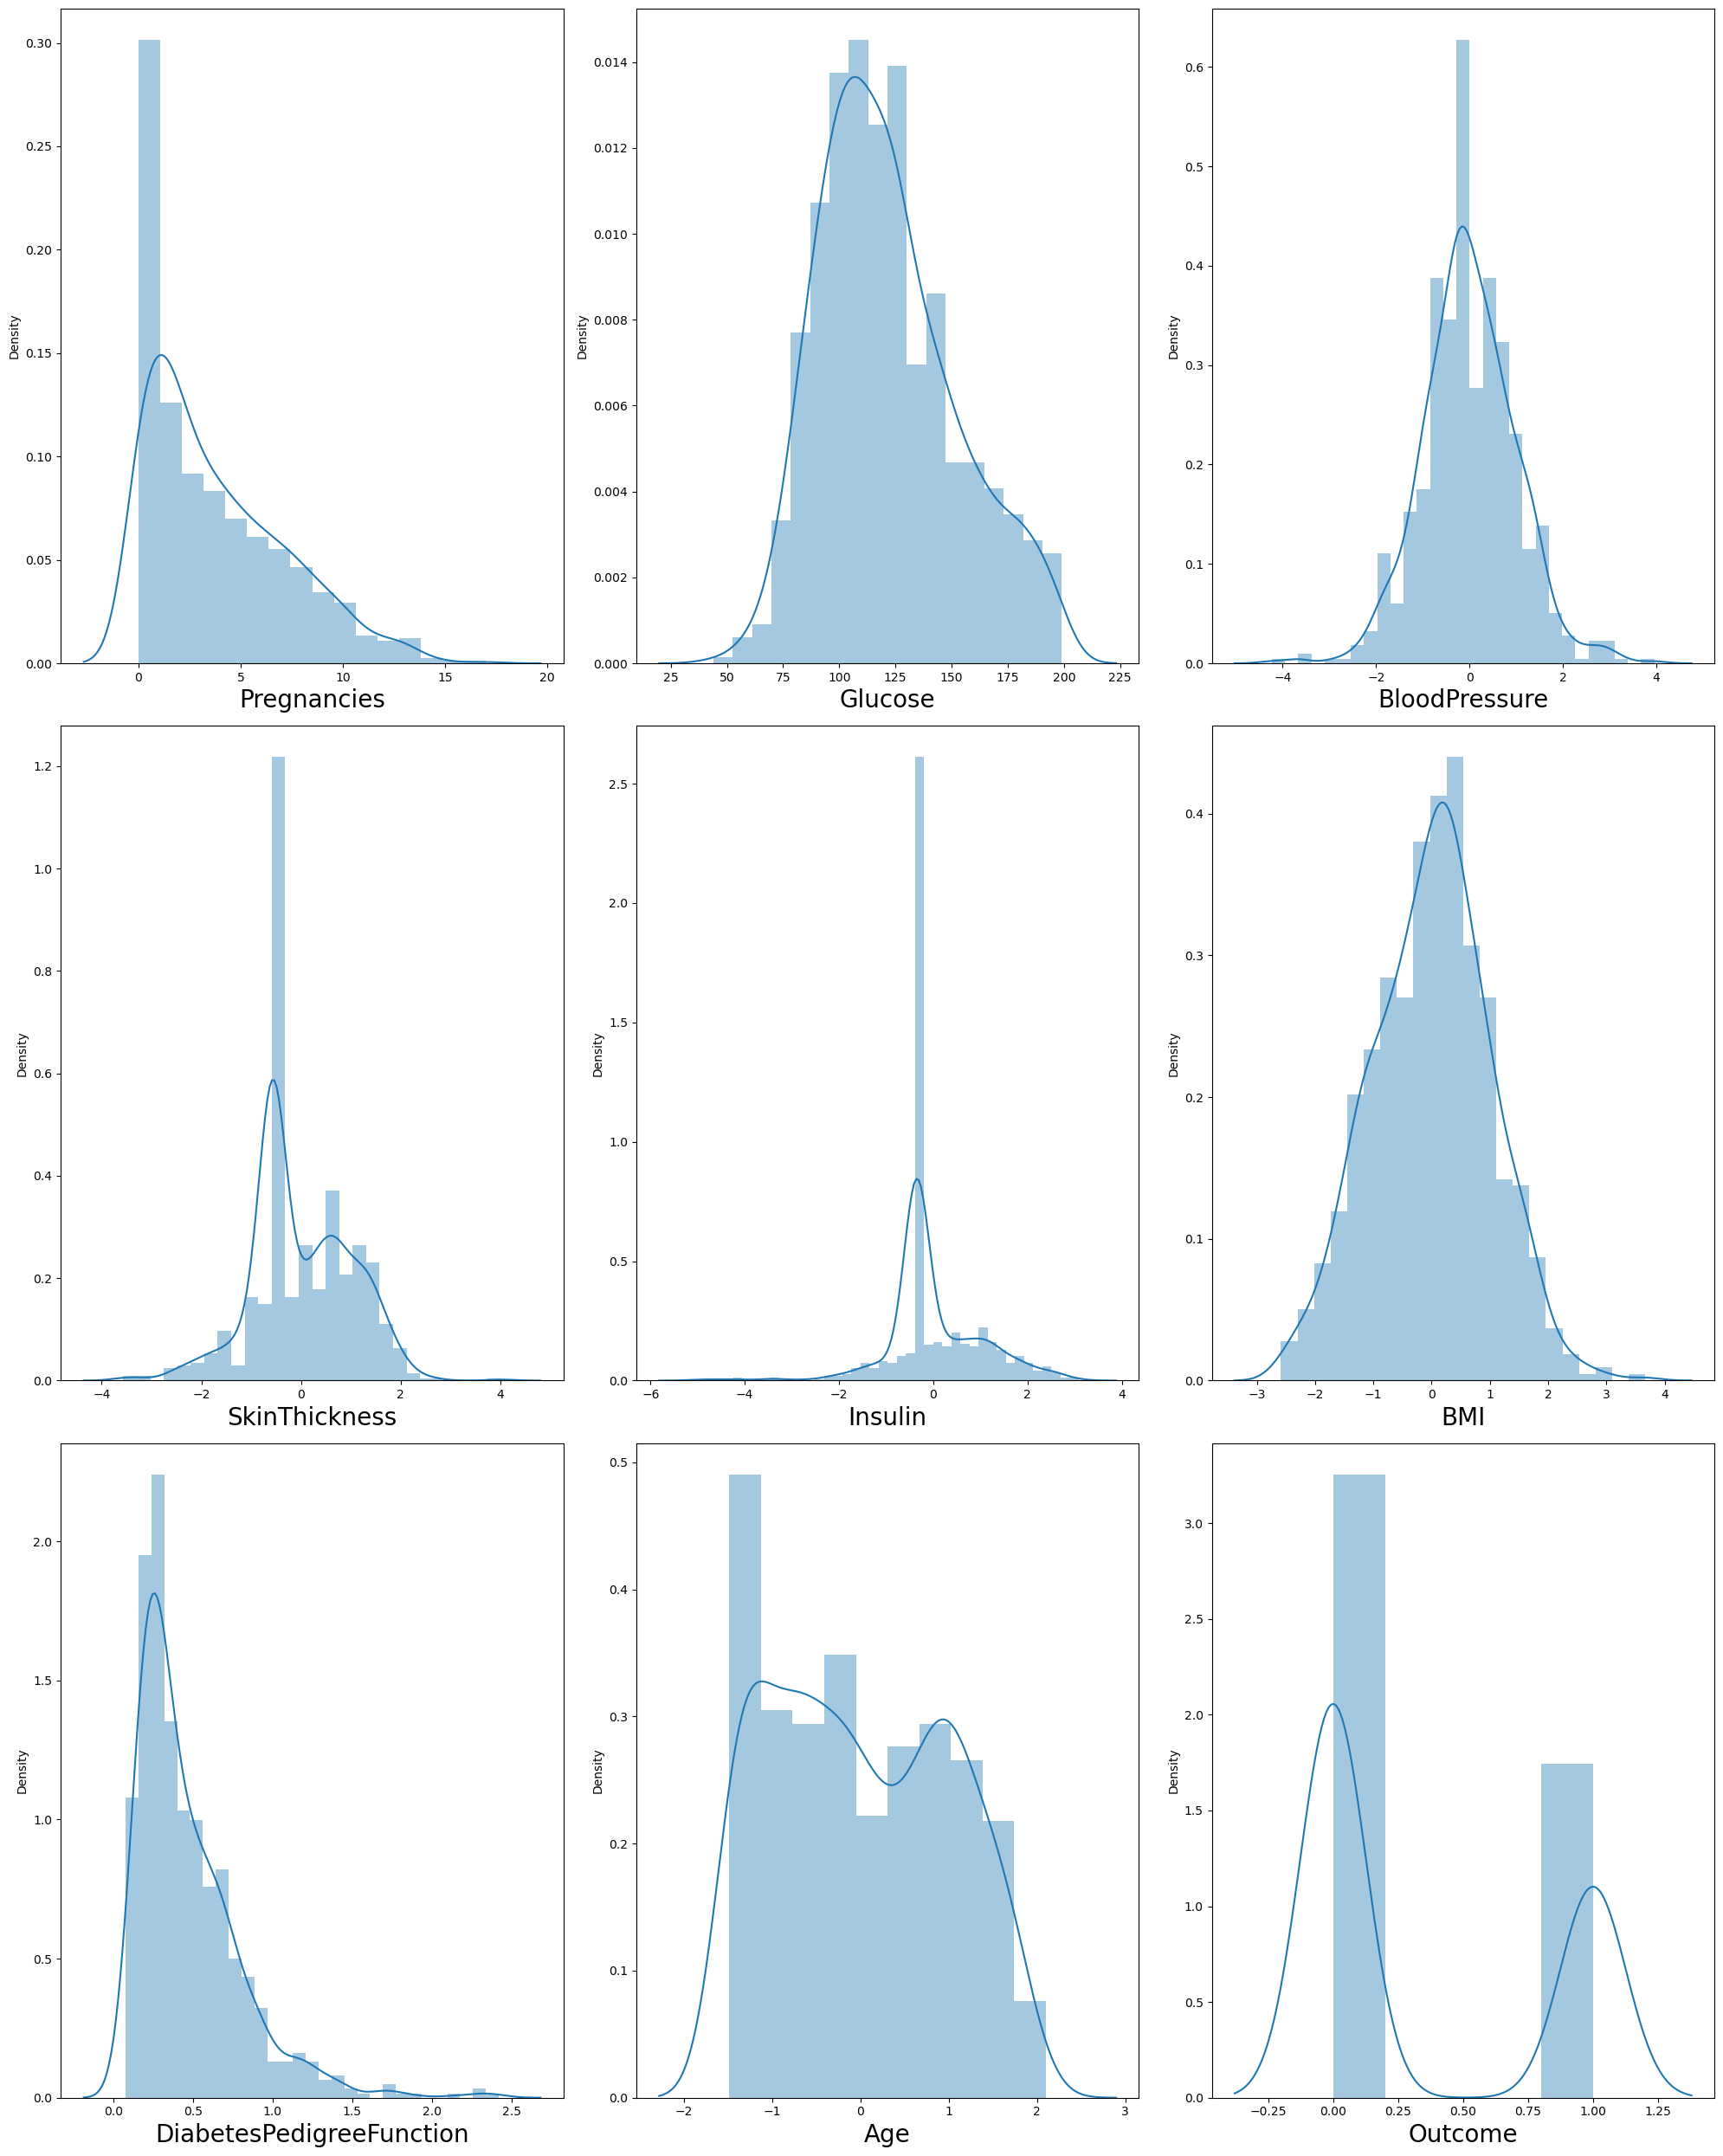

In [28]:
# lets see how data is distributed for every column after power transformer
# lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# post all transformations you can continue with train test split (you dont need to apply standard scaler on top of it)